cell resistance $= 10.0M \Omega \pm 0.5M \Omega$

In [394]:
import scipy.io as io
import matplotlib.pyplot as plt
import numpy as np
import glob

from matplotlib import pyplot as plt
import matplotlib as mpl
import scipy.optimize as opt
import scipy.interpolate as inter
import math
def sin_model(x,A,phi,omega,b):
    return A* np.sin(omega*x+phi)+b
def line_model(x,m,b):
    return m*x+b
def birefit(T,D,E):
    return D*((1-(E*T)/34.5)**0.2)

c2='red' 
c1='blue' 
n=44
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)
def birefringence(phi,d,lam,theta):
    top= phi*lam
    bottom= 2* np.pi*d*np.sin(theta)**2
    return top/bottom

$\delta=\frac{2\pi d \Delta n}{\lambda}$

where $ d $ is the thickness of the of the LC

$\Delta n $ is the birefringemce

$\lambda$ is the wavelength = 630 nm?

$\delta$ is the phase

$\Delta n(T)= \frac{\lambda}{2 \pi D} \tan^{-1}(\sqrt{\frac{max}{min}})$

In [325]:
def deltan(phi,lamda,d):
    return (phi*lamda)/(2*np.pi*d)
birecon= (632.8e-9)/(2*np.pi*5e-6)

array([0.99636971, 0.72887993])

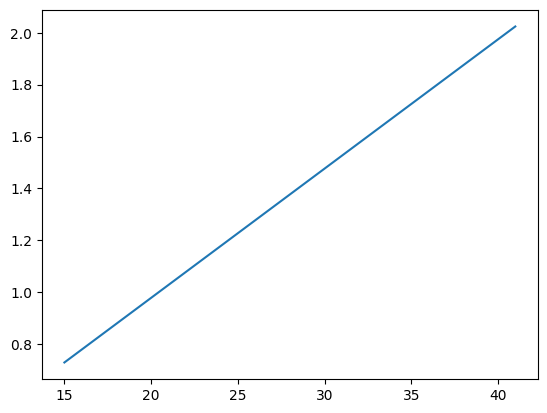

In [326]:
xl,yl=[],[]
filenames=glob.glob('Temp*/*.mat')
for i in filenames:
    xl.append(io.loadmat(i)["Tempture"][0])
    yl.append(io.loadmat(i)["Voltage_O"][0])

xfine= np.linspace(0,max(xl[0]),10000)   

p1,cl1 = opt.curve_fit(line_model, xl[1], yl[1],p0=(1,0))
plt.plot(20*xfine+15,line_model(xfine,*p1))
p1

In [327]:
cl1

array([[ 1.01522073e-06, -6.64969572e-07],
       [-6.64969572e-07,  5.82888975e-07]])

In [328]:
for i in filenames:
    xl.append(io.loadmat(i)["Tempture"][0])
    yl.append(io.loadmat(i)["Voltage_O"][0])

In [329]:
xl,yl=[],[]
filenames=["20c100-5000.mat","20-5c100-5000.mat","21c100-5000.mat","21-5c100-5000.mat","22c100-5000.mat","22-5c100-5000.mat","23c100-5000.mat","23-5c100-5000.mat","24c100-5000.mat","24-5c100-5000.mat","25-c100-5000.mat","25-5-c100-5000.mat","26-c100-5000.mat","26-5-c100-5000.mat","27-c100-5000.mat","27-5-c100-5000.mat","28-c100-5000.mat","28-5-c100-5000.mat","29-c100-5000.mat","29-5-c100-5000.mat","30-c100-5000.mat","30-5-c100-5000.mat","31-c100-5000.mat","31-5-c100-5000.mat","32-c100-5000.mat","32-5-c100-5000.mat","33-c100-5000.mat","33-5-c100-5000.mat","34-c100-5000.mat","34-5-c100-5000.mat","35-c100-5000.mat","35-5-c100-5000.mat","36-c100-5000.mat","36-5-c100-5000.mat","37-c100-5000.mat","37-5-c100-5000.mat","38-c100-5000.mat","38-5-c100-5000.mat","39-c100-5000.mat","39-5-c100-5000.mat","40-c100-5000.mat"]
for i in filenames:
    xl.append(io.loadmat("DATA1/"+i)["VP"][0])
    yl.append(io.loadmat("DATA1/"+i)["Voltage_O"][0])

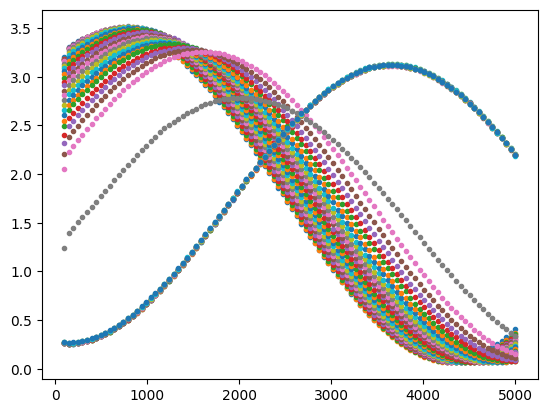

In [330]:
for x,y in zip(xl,yl):
    plt.plot(x,y,".")

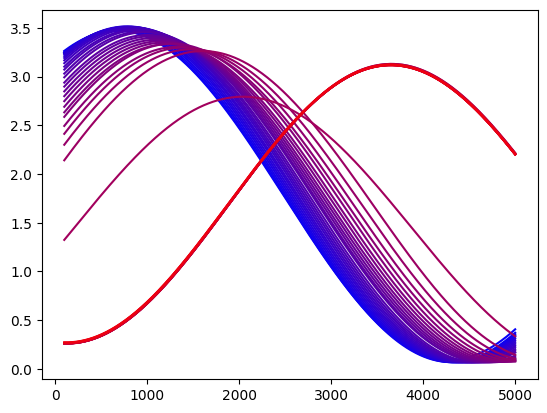

In [331]:
arange= np.arange(20,40.5,.5)
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]

crange=np.arange(1,len(xl)+1)
for x,y,i in zip(arange,yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,2*np.pi/3,1/8000,1.5))
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

In [332]:
pl=np.array(pl)
cl=np.array(cl)

In [333]:
len(t)

NameError: name 't' is not defined

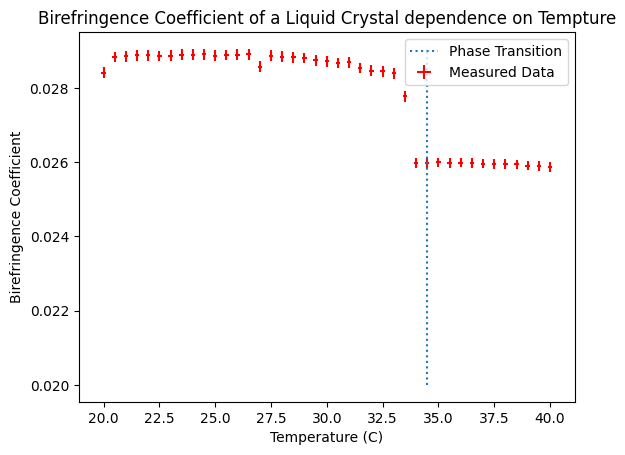

In [334]:
iparrell=[]
iperpendiclur=[]
ratio=[]
tange=np.arange(20,40.5,.5)
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange)
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.errorbar(tange,birecon*np.arctan(np.sqrt(ratio)),xerr=xerrr,yerr=.005*birecon*np.arctan(np.sqrt(ratio)),ls='none',color="red",label= "Measured Data")
plt.ylabel("Birefringence Coefficient")
plt.xlabel("Temperature (C)")
plt.title("Birefringence Coefficient of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0.02,.029,linestyles="dotted",label="Phase Transition")
#plt.ylim(0.020,0.029)
plt.legend()
plt.savefig("plot0",dpi=184)

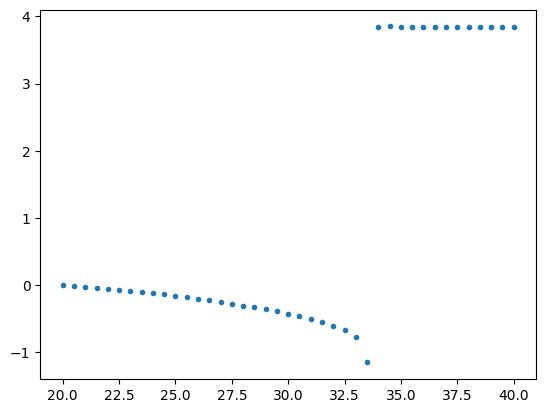

In [335]:
trange=np.arange(20,40.5,.5)
plt.plot(trange,pl.T[1]- pl.T[1][0],".")

In [385]:
xl,yl=[],[]
filenames=glob.glob('poc0/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][5:6])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])
yl=np.round(yl,5)

In [386]:
eyl=0.003*yl+0.002
eyl

array([[0.00374366, 0.00388439, 0.00403514, ..., 0.00477299, 0.0046037 ,
        0.00443996],
       [0.0037796 , 0.00386372, 0.00399995, ..., 0.00480437, 0.0046355 ,
        0.00447128],
       [0.00381638, 0.00390053, 0.00403793, ..., 0.00482999, 0.00466256,
        0.0044972 ],
       ...,
       [0.0067232 , 0.00665954, 0.00655373, ..., 0.00996389, 0.00999944,
        0.01002959],
       [0.0067289 , 0.00666554, 0.00655796, ..., 0.00998858, 0.01002638,
        0.01006451],
       [0.00672416, 0.0066635 , 0.00655175, ..., 0.00999743, 0.01003277,
        0.01006889]])

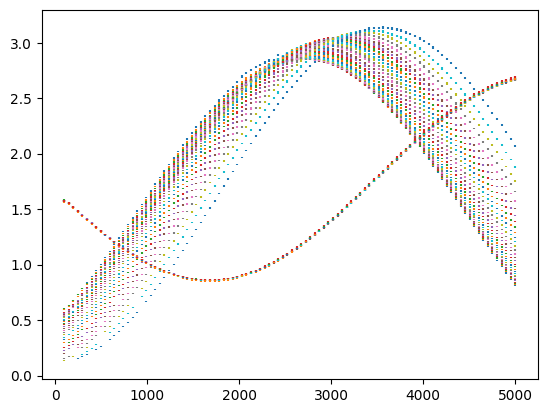

In [387]:
for x,y,e in zip(xl,yl,eyl):
    plt.errorbar(x,y,yerr=e,ls='none')


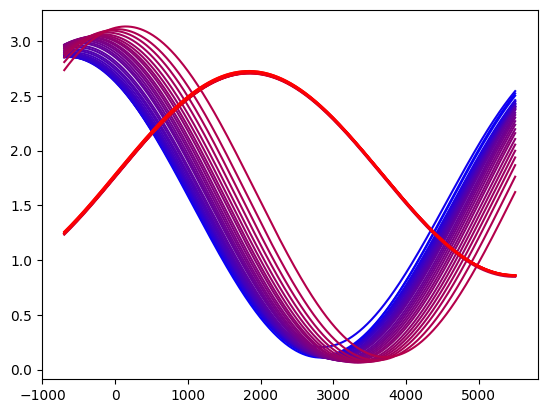

In [433]:
arange= np.arange(20,40.5,.5)
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i,e in zip(yl,crange,eyl):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,0,1/8000,1.5),sigma=e*np.ones_like(y))
   
    p[1]=p[1]+3
  
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

In [434]:
e1=np.diag(cl[0])

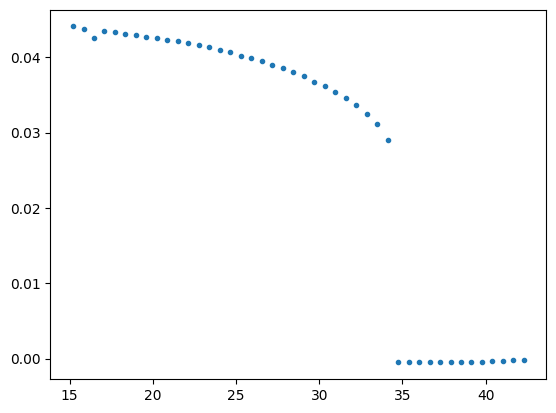

In [435]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,birecon*pl.T[1],".")

/tmp/ipykernel_2225795/1945428939.py:16: RuntimeWarning: invalid value encountered in power
  return D*((1-(E*T)/34.5)**0.2)


array([0.04978623, 0.9230352 ])

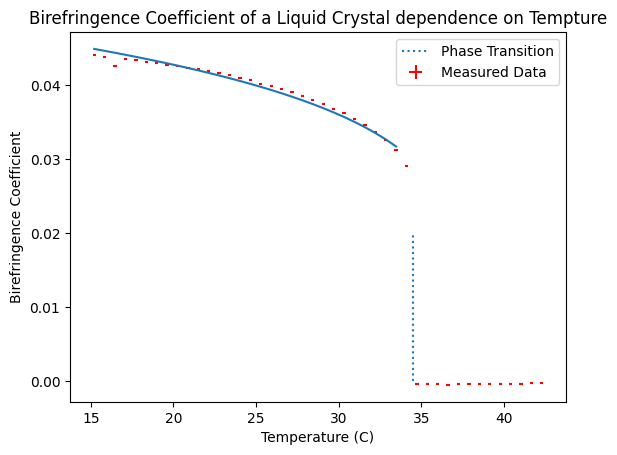

In [436]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange)
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.errorbar(tange,birecon*pl.T[1],xerr=xerrr,yerr=birecon*e1[1],ls='none',color="red",label= "Measured Data")
p,c=opt.curve_fit(birefit,tange[:-13],birecon*pl.T[1][:-13],p0=[0.05, 0.94],maxfev=10000)
plt.ylabel("Birefringence Coefficient")
plt.xlabel("Temperature (C)")
plt.title("Birefringence Coefficient of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0,0.02,linestyles="dotted",label="Phase Transition")
#plt.ylim(0.020,0.029)
plt.plot(tange[:-14],birefit(tange,*p)[:-14])
plt.legend()
plt.savefig("plot1",dpi=184)
p

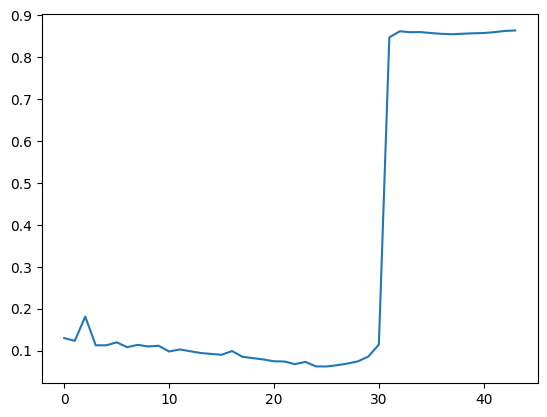

In [323]:
plt.plot(iperpendiclur)


0.07635327203006605

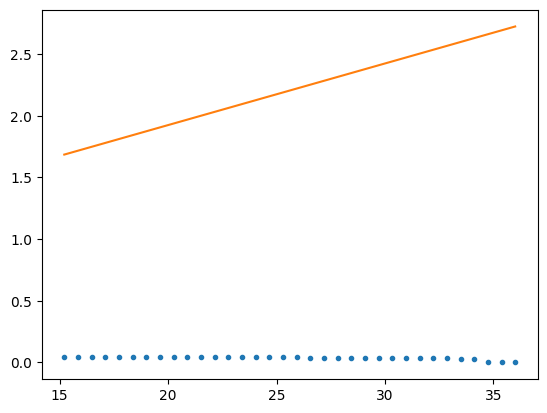

In [415]:
p1,c=opt.curve_fit(line_model,tange[:-15],birecon*pl.T[1][:-15])
plt.plot(tange[:-10],birecon*pl.T[1][:-10],'.',label= "Measured Data")

plt.plot(tange[:-10],line_model(tange[:-10],*p))
n0=birefit(-273.15,*p)
n0

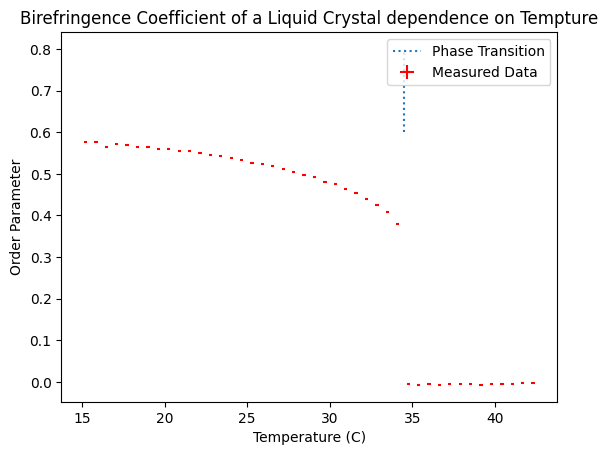

In [420]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange)
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.errorbar(tange,(birecon*pl.T[1])/n0,xerr=xerrr,yerr=np.abs(.005*birecon*pl.T[1]),ls='none',color="red",label= "Measured Data")
plt.ylabel("Order Parameter")
plt.xlabel("Temperature (C)")
plt.title("Order Parameter of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0.6,0.8,linestyles="dotted",label="Phase Transition")

plt.legend()
plt.savefig("plot2",dpi=184)

In [85]:
xl,yl=[],[]
filenames=glob.glob('Poc45/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][6:8] ) )
    except: 
        return(int(x.split()[0][6:7])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

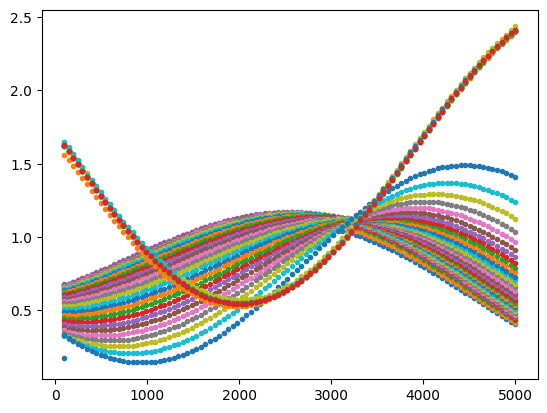

In [86]:
for x,y in zip(xl,yl):
    plt.plot(x,y,".")


KeyboardInterrupt: 

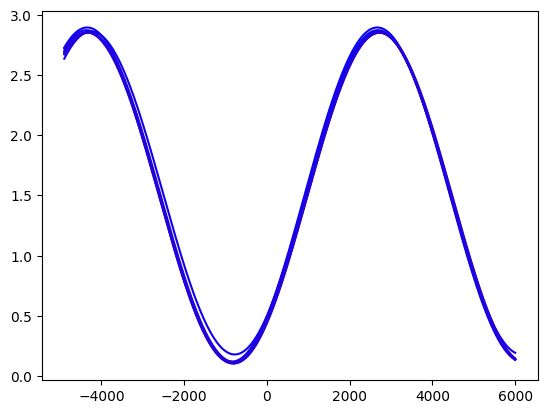

In [383]:

xfine= np.linspace(min(xl[0])-5000,max(xl[0]+1000),100000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(.1,np.pi/2,1/8000,.8),bounds=([-np.inf,-np.inf,-np.inf,0],np.inf),max_nfev=100000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


In [ ]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))  
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.plot(np.arctan(np.sqrt(ratio)))


In [ ]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1]- pl.T[1][0],".")

In [ ]:
xl,yl=[],[]
filenames=glob.glob('poc134/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][6:8] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

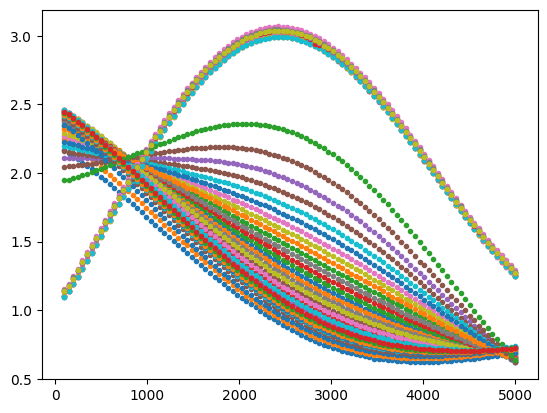

In [28]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")


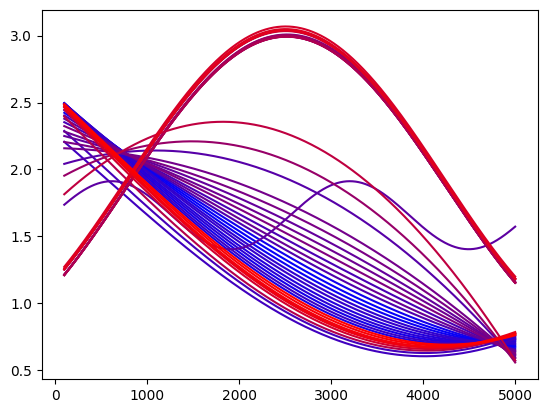

In [29]:
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,5*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


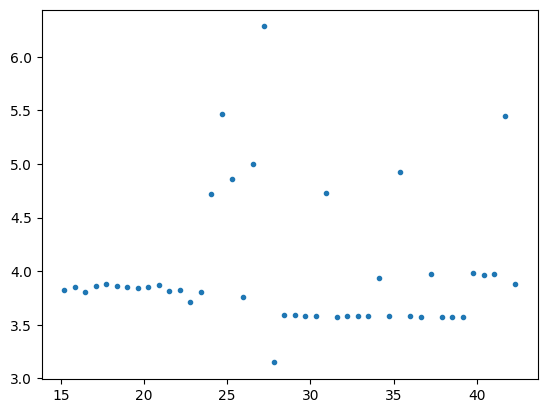

In [30]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1],".")

In [88]:
xl,yl=[],[]
filenames=glob.glob('poc180/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

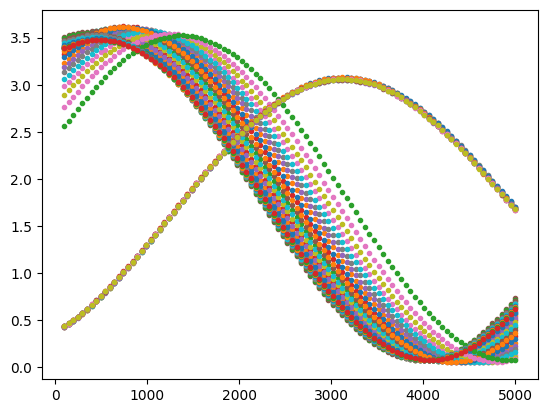

In [89]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")
   

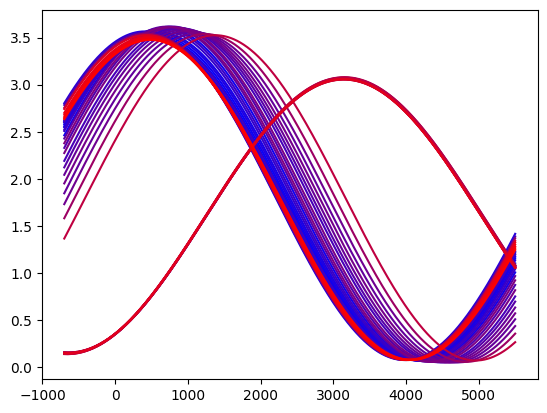

In [90]:
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,8*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))


In [ ]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange)
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.errorbar(tange,birecon*np.arctan(np.sqrt(ratio)),xerr=xerrr,yerr=.005*birecon*np.arctan(np.sqrt(ratio)),ls='none',color="red",label= "Measured Data")
plt.ylabel("Birefringence Coefficient")
plt.xlabel("Temperature (C)")
plt.title("Birefringence Coefficient of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0,1,linestyles="dotted",label="Phase Transition")
plt.ylim(0.020,0.029)
plt.legend()


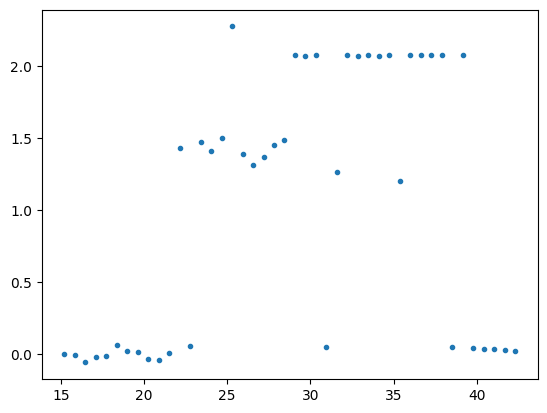

In [43]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1]- pl.T[1][0],".")

In [91]:
xl,yl=[],[]
filenames=glob.glob('poc224/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

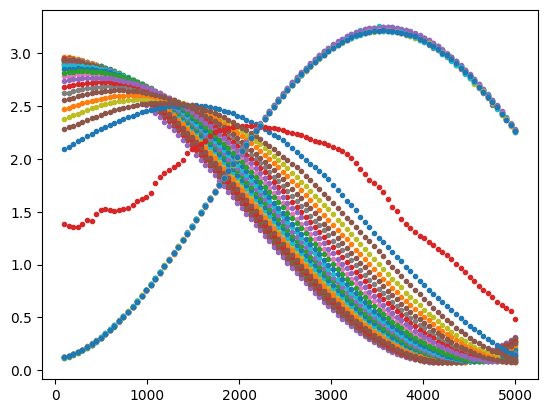

In [45]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")
   

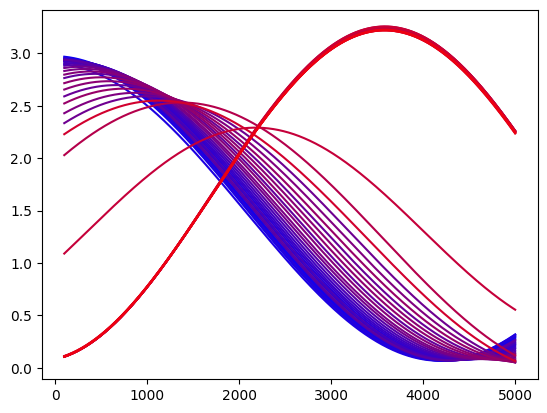

In [93]:
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,10*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

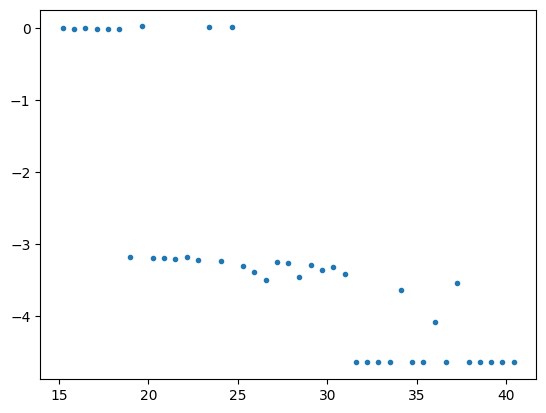

In [94]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.33,0.03)+15
plt.plot(tange[:-4],pl.T[1]- pl.T[1][0],".")

In [102]:
len(tange[:-4]),len(pl),len(xerrr),len(ratio)

(41, 41, 41, 41)

/tmp/ipykernel_2225795/1053259447.py:10: RuntimeWarning: invalid value encountered in sqrt
  plt.errorbar(tange[:-4],birecon*np.arctan(np.sqrt(ratio)),xerr=xerrr,yerr=.005*birecon*np.arctan(np.sqrt(ratio)),ls='none',color="red",label= "Measured Data")


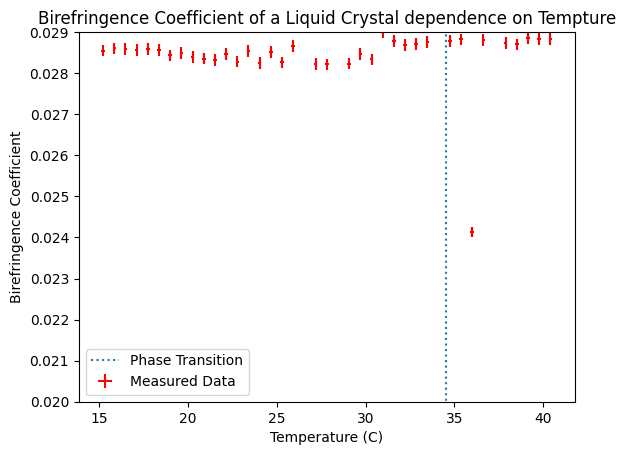

In [103]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange[:-4])
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p))/min(sin_model(xfine,*p)))    
plt.errorbar(tange[:-4],birecon*np.arctan(np.sqrt(ratio)),xerr=xerrr,yerr=.005*birecon*np.arctan(np.sqrt(ratio)),ls='none',color="red",label= "Measured Data")
plt.ylabel("Birefringence Coefficient")
plt.xlabel("Temperature (C)")
plt.title("Birefringence Coefficient of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0,1,linestyles="dotted",label="Phase Transition")
plt.ylim(0.020,0.029)
plt.legend()

In [231]:
xl,yl=[],[]
filenames=glob.glob('poc270/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

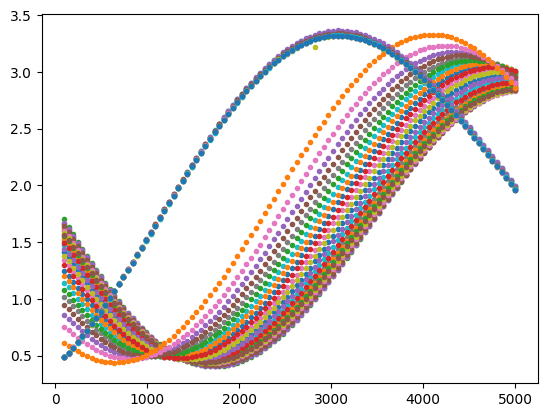

In [232]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")

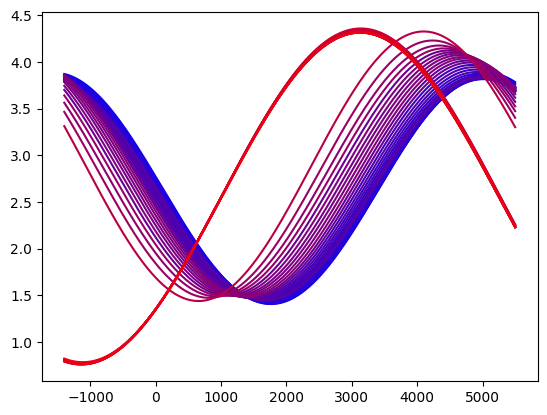

In [254]:
xfine= np.linspace(min(xl[0])-1500,max(xl[0])+500,10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,2*np.pi/4,1/8000,1.5),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p)+1,color=colorFader(c1,c2,i/n))

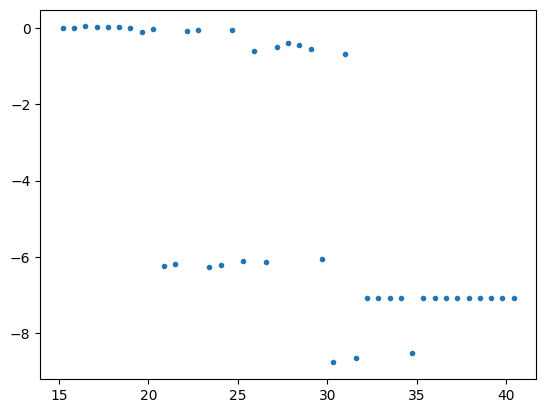

In [242]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange[:-3],pl.T[1]- pl.T[1][0],".")

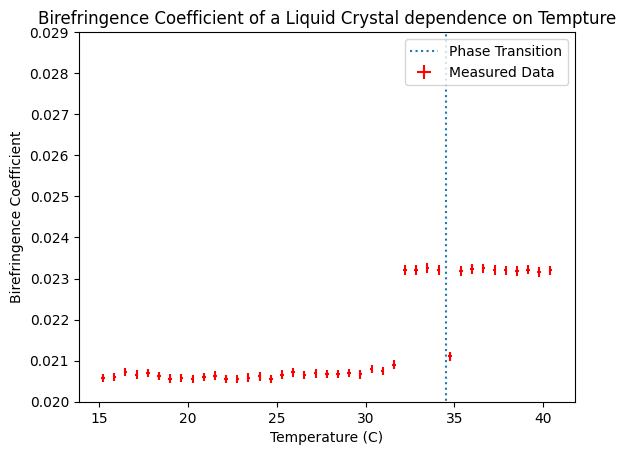

In [255]:
iparrell=[]
iperpendiclur=[]
ratio=[]
xfine= np.linspace(min(xl[0])-800,max(xl[0])+500,10000)
xerrr= 0.1*np.ones_like(tange[:-3])
for p in pl:
    iparrell.append(max(sin_model(xfine,*p)))
    iperpendiclur.append(min(sin_model(xfine,*p)))
    ratio.append(max(sin_model(xfine,*p)+1)/min(sin_model(xfine,*p)+1))    
plt.errorbar(tange[:-3],birecon*np.arctan(np.sqrt(ratio)),xerr=xerrr,yerr=.005*birecon*np.arctan(np.sqrt(ratio)),ls='none',color="red",label= "Measured Data")
plt.ylabel("Birefringence Coefficient")
plt.xlabel("Temperature (C)")
plt.title("Birefringence Coefficient of a Liquid Crystal dependence on Tempture")
plt.vlines(34.5,0,1,linestyles="dotted",label="Phase Transition")
plt.ylim(0.020,0.029)
plt.legend()
plt.savefig("plot1",dpi=184)

In [256]:
ratio

[2.671581910975305,
 2.6869705529106747,
 2.7616144564048337,
 2.7210869880193225,
 2.742489997761812,
 2.700609139656641,
 2.6607987161357234,
 2.6662500515141425,
 2.6573021789393616,
 2.6835667197421054,
 2.703908939996488,
 2.6591136284372547,
 2.6567607761243472,
 2.673833604338008,
 2.693309351056502,
 2.6543240644407335,
 2.7188843379021814,
 2.7529054180311237,
 2.711463326021473,
 2.736576721662271,
 2.726548389694352,
 2.729718213348598,
 2.741834712741045,
 2.724496034026283,
 2.806075655597315,
 2.770621161617764,
 2.8718775929563067,
 5.054166495289342,
 5.048416038583273,
 5.11667585365751,
 5.042860490564762,
 3.007529360579184,
 5.013855246238629,
 5.088994980865019,
 5.1044094373643265,
 5.051159571581469,
 5.04125283138143,
 5.024651481497592,
 5.063669874020703,
 4.984711749963951,
 5.036219866455456]

In [261]:
xl,yl=[],[]
filenames=glob.glob('poc314/*.mat')
def keys(x):
    try:
        return(int(x.split()[0][5:7] ) )
    except: 
        return(int(x.split()[0][7:8])  )  

filenames.sort(key = keys )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

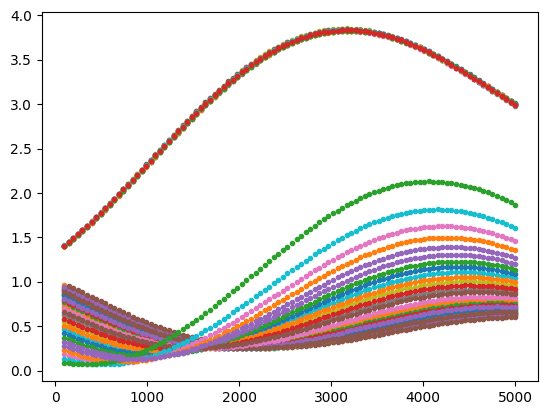

In [262]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")

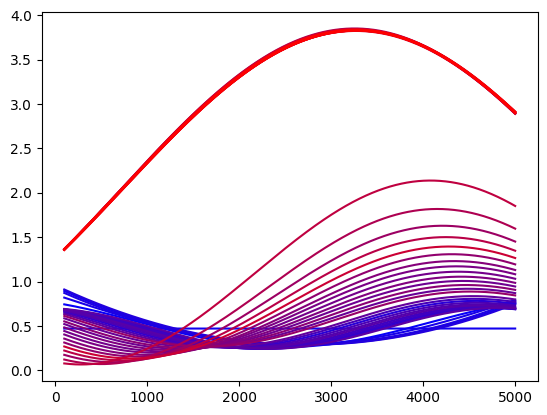

In [263]:
xfine= np.linspace(min(xl[0]),max(xl[0]),10000)
pl=[]
cl=[]
crange=np.arange(1,len(xl)+1)
for y,i in zip(yl,crange):
    p,c = opt.curve_fit(sin_model, xl[0], y,p0=(2,4*np.pi/7,1/8000,1),maxfev=10000)
    pl.append(p)
    cl.append(c)
    plt.plot(xfine,sin_model(xfine,*p),color=colorFader(c1,c2,i/n))

In [ ]:
pl=np.array(pl)
cl=np.array(cl)   
tange=21*np.arange(0.01,1.32,0.03)+15
plt.plot(tange,pl.T[1]- pl.T[1][0],".")

In [ ]:
xl,yl=[],[]
filenames=glob.glob('volt30c/*.mat')

filenames.sort( )
for i in filenames:
    xl.append(io.loadmat(i)["HV"][0])
    yl.append(io.loadmat(i)["Voltage_R"][0])

In [ ]:
for x,y in zip(xl[:],yl[:]):
    plt.plot(x,y,".")